In [ ]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
np.random.seed(42)

In [ ]:
Loading the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/tsrm'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/tsrm/Train/1/00001_00000_00008.png
/content/drive/MyDrive/tsrm/Train/1/00001_00000_00012.png
/content/drive/MyDrive/tsrm/Train/1/00001_00001_00009.png
/content/drive/MyDrive/tsrm/Train/1/00001_00000_00006.png
/content/drive/MyDrive/tsrm/Train/1/00001_00001_00002.png
/content/drive/MyDrive/tsrm/Train/1/00001_00000_00015.png
/content/drive/MyDrive/tsrm/Train/1/00001_00001_00008.png
/content/drive/MyDrive/tsrm/Train/1/00001_00000_00010.png
/content/drive/MyDrive/tsrm/Train/1/00001_00000_00014.png
/content/drive/MyDrive/tsrm/Train/1/00001_00000_00025.png
/content/drive/MyDrive/tsrm/Train/1/00001_00001_00005.png
/content/drive/MyDrive/tsrm/Train/1/00001_00000_00000.png
/content/drive/MyDrive/tsrm/Train/1/00001_00001_00001.png
/content/drive/MyDrive/tsrm/Train/1/00001_00000_00029.png
/content/drive/MyDrive/tsrm/Train/1/00001_00001_00010.png
/content/drive/MyDrive/tsrm/Train/1/00001_00000_00018.png
/content/drive/MyDriv

In [ ]:
data_dir = '/content/drive/MyDrive/tsrm'
train_path = '/content/drive/MyDrive/tsrm/Train'
test_path = '/content/drive/MyDrive/tsrm/Test'

In [ ]:
# Resizing the images to 30x30x3
img_ht = 30
img_wt = 30
channels = 3

In [ ]:
num_classes = len(os.listdir(train_path))
num_classes

43

In [ ]:
image_data = []
image_labels = []

for i in range(num_classes):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((img_ht, img_wt))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

(39229, 30, 30, 3) (39229,)


In [ ]:
# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.25, random_state=42, shuffle=True)
X_train = X_train/255 
X_val = X_val/255
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27460, 30, 30, 3)
X_valid.shape (11769, 30, 30, 3)
y_train.shape (27460,)
y_valid.shape (11769,)


In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.np_utils.to_categorical(y_val, NUM_CATEGORIES)
print(y_train.shape)
print(y_val.shape)

(27460, 43)
(11769, 43)


In [ ]:
model = Sequential()   
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(img_ht,img_wt,channels)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
430/430 [==============================] - 12s 9ms/step - loss: 1.8442 - accuracy: 0.4834 - val_loss: 0.3694 - val_accuracy: 0.9049
Epoch 2/15
430/430 [==============================] - 3s 8ms/step - loss: 0.3955 - accuracy: 0.8790 - val_loss: 0.1237 - val_accuracy: 0.9684
Epoch 3/15
430/430 [==============================] - 3s 7ms/step - loss: 0.2139 - accuracy: 0.9363 - val_loss: 0.0765 - val_accuracy: 0.9797
Epoch 4/15
430/430 [==============================] - 3s 8ms/step - loss: 0.1585 - accuracy: 0.9521 - val_loss: 0.0469 - val_accuracy: 0.9881
Epoch 5/15
430/430 [==============================] - 3s 8ms/step - loss: 0.1191 - accuracy: 0.9651 - val_loss: 0.0329 - val_accuracy: 0.9916
Epoch 6/15
430/430 [==============================] - 3s 8ms/step - loss: 0.0953 - accuracy: 0.9720 - val_loss: 0.0272 - val_accuracy: 0.9929
Epoch 7/15
430/430 [==============================] - 3s 8ms/step - loss: 0.0855 - accuracy: 0.9738 - val_loss: 0.0298 - val_accuracy: 0.9923
Epoch

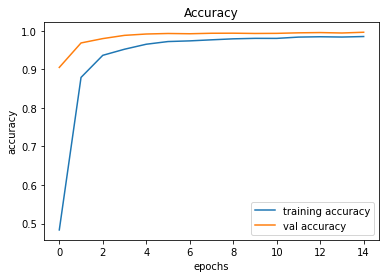

In [ ]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

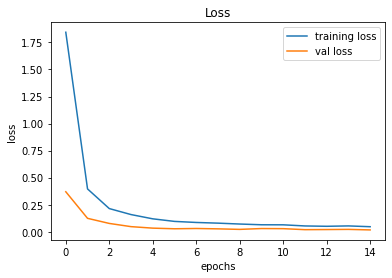

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')
labels = test["ClassId"].values
imgs = test["Path"].values
data =[]
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((img_ht, img_wt))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

395/395 [==============================] - 1s 2ms/step
Test Data accuracy:  97.1021377672209


In [ ]:
#pred = model.predict_classes(X_test)
pred = model.predict(X_test) 
pred = np.argmax(pred, axis=1)

In [ ]:
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

In [ ]:
model.save('my_model.h5')